# BE 5210: Homework 0

Spring 2026  |  15 points

**Due:** Thursday 1/22/2026 10:00 PM

**Objective:** Setup a conenction to Pennsieve, then stream and process EEG data.

## Introduction to Pennsieve

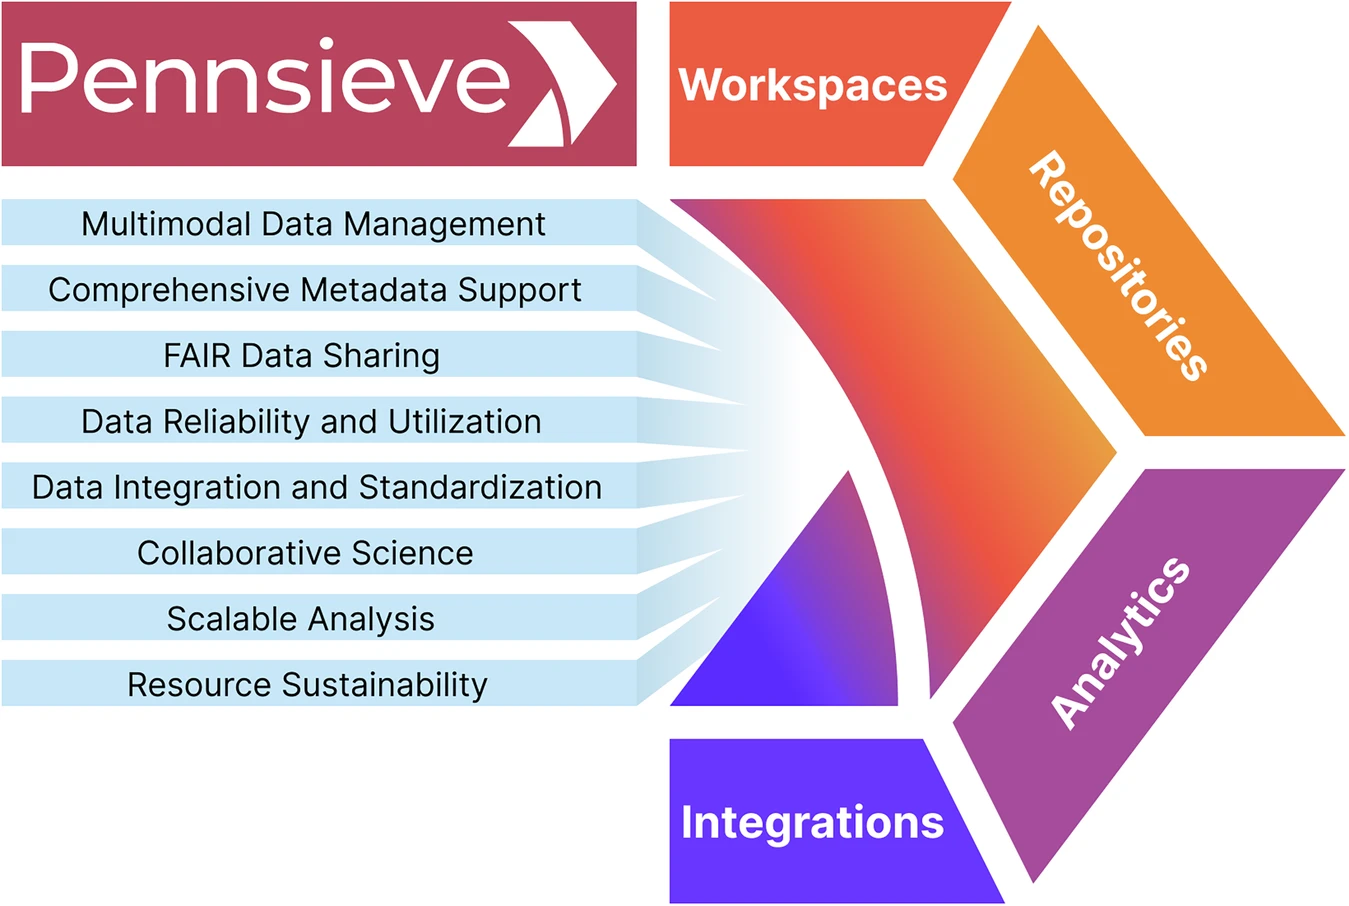

In BE 5210, we use **Pennsieve** to host and manage the neural datasets required for your homework assignments and the final project.

### What is Pennsieve?
Pennsieve is an open-source, cloud-based scientific data management platform ([developed right here at Penn](https://discover.pennsieve.io/about/team)) designed specifically for multidisciplinary neuroscience research. Unlike traditional methods where you might download large, static files (like .mat or .edf) to your local machine, Pennsieve allows us to:
* **Stream multimodal data:** Access high-resolution electrophysiology (EEG/iEEG), imaging, and clinical metadata directly from the cloud.
* **Conduct collaborative science:** Create shared workspaces where datasets are curated, versioned, and eventually published.
* **Scale your analyses:** Data analysis pipelines can be run directly in Pennsieve without needing to leave the platfom. We won't be using this feature in the class, but having data and compute co-located in the cloud has major benefits!

### Supporting your research
Pennsieve currently hosts over **35 TB** of scientific data publicly available in more than 350 high-impact datasets. You can check out the full data repository on [Pennsieve Discover](https://discover.pennsieve.io/).

If you are interseted in learning more, Pennsive has extensive [guides and documentation](https://docs.pennsieve.io/docs/getting-started). We also published a paper on Pennsieve in Nature Scientific Data last year: https://www.nature.com/articles/s41597-025-06075-5

## BE 5210 workspace on Pennsieve

You will have recieved an email invitation to join the BE 5210 workspace on Pennsieve. You must accept the invitation if you have not already. If you have not recieved an email, please check your spam folder first, and then reach out to the TAs for help. It will look like:

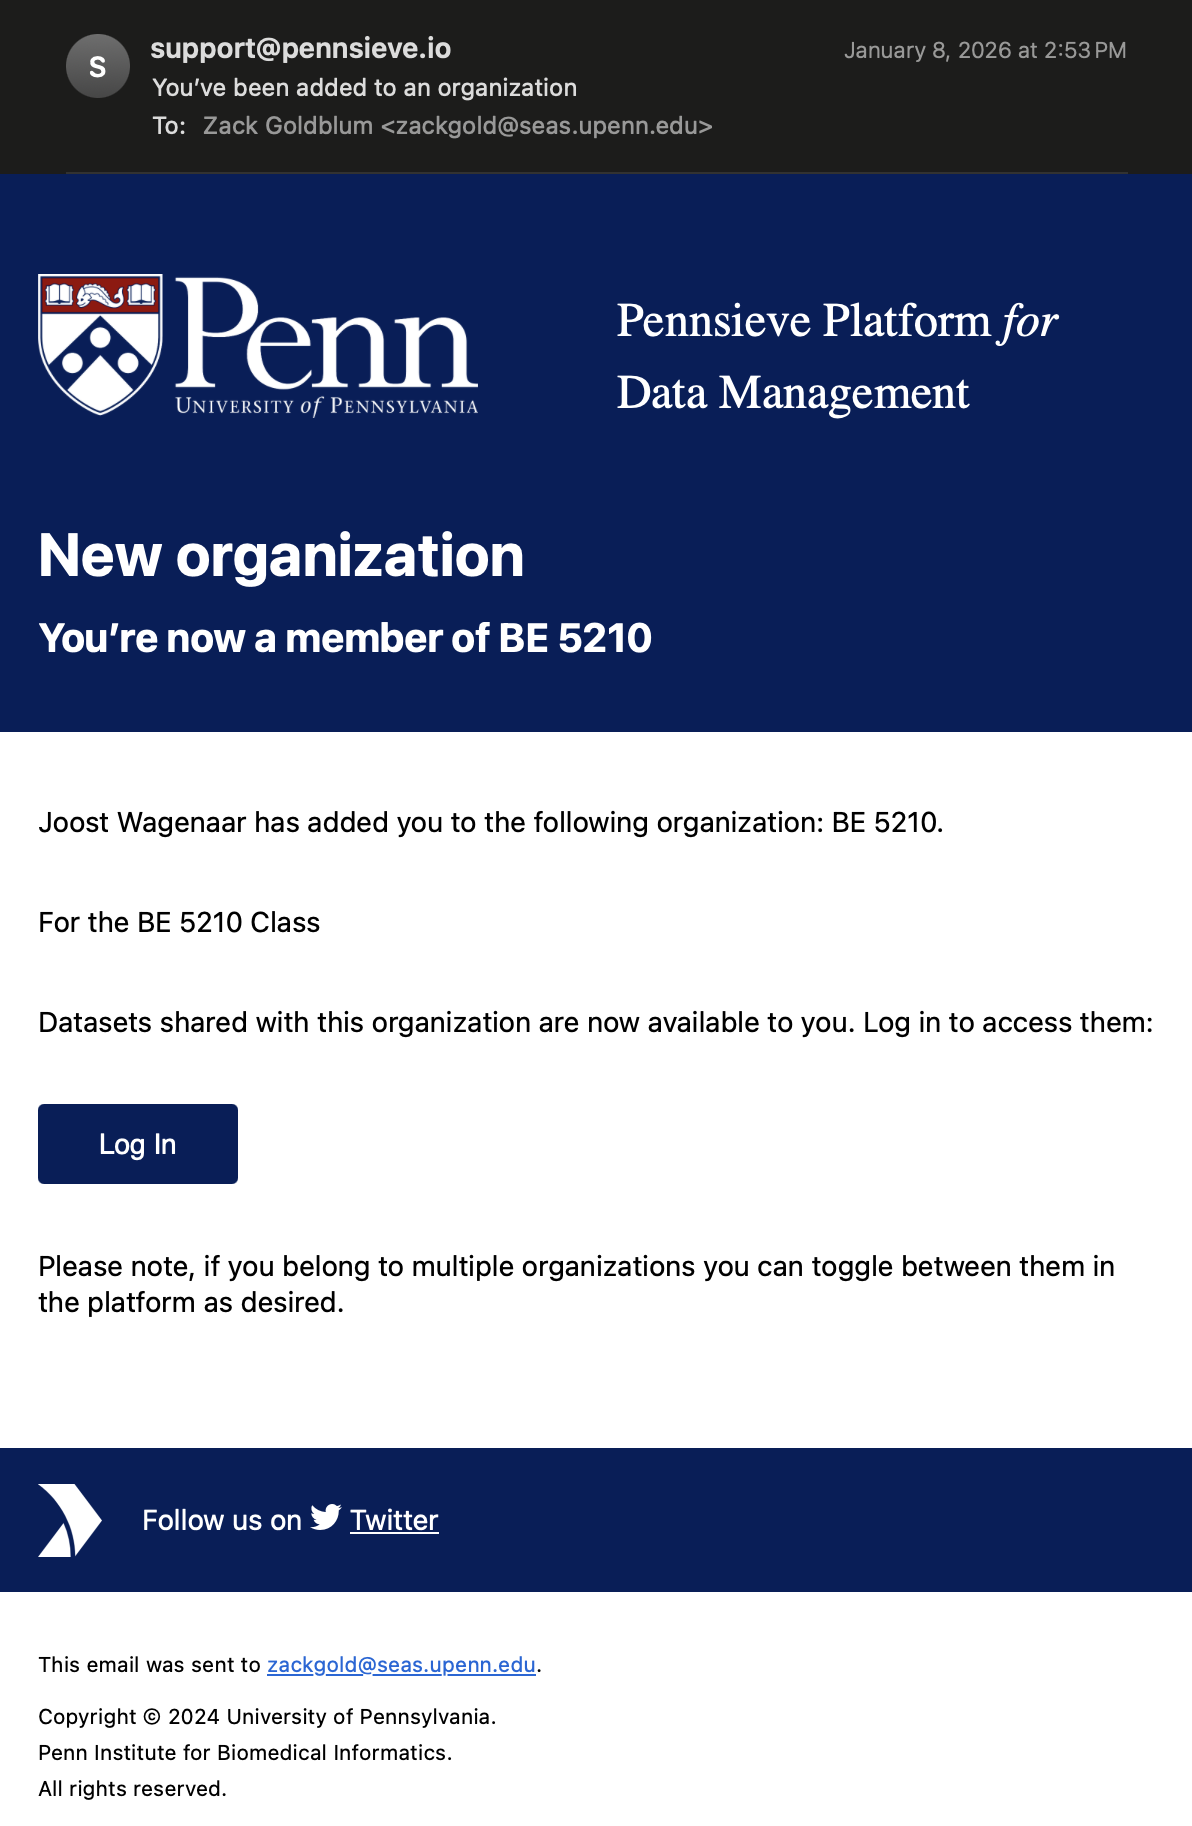

After you sign in, select the BE 5210 workspace:

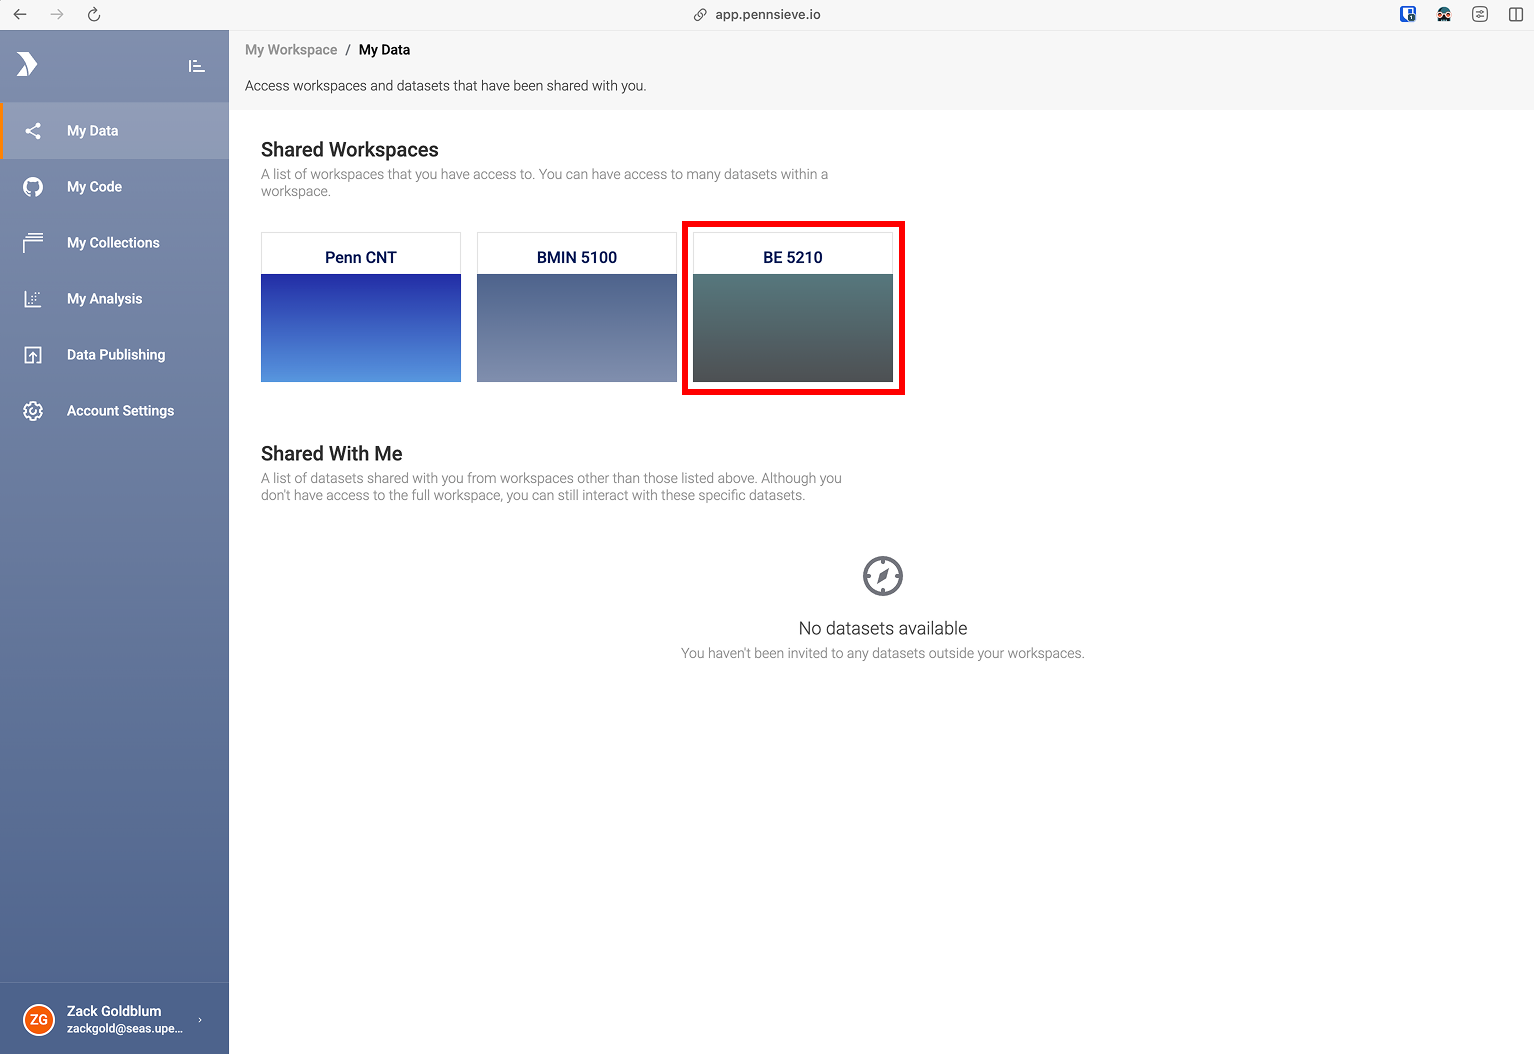

And now you're in the BE 5210 workspace for the class:

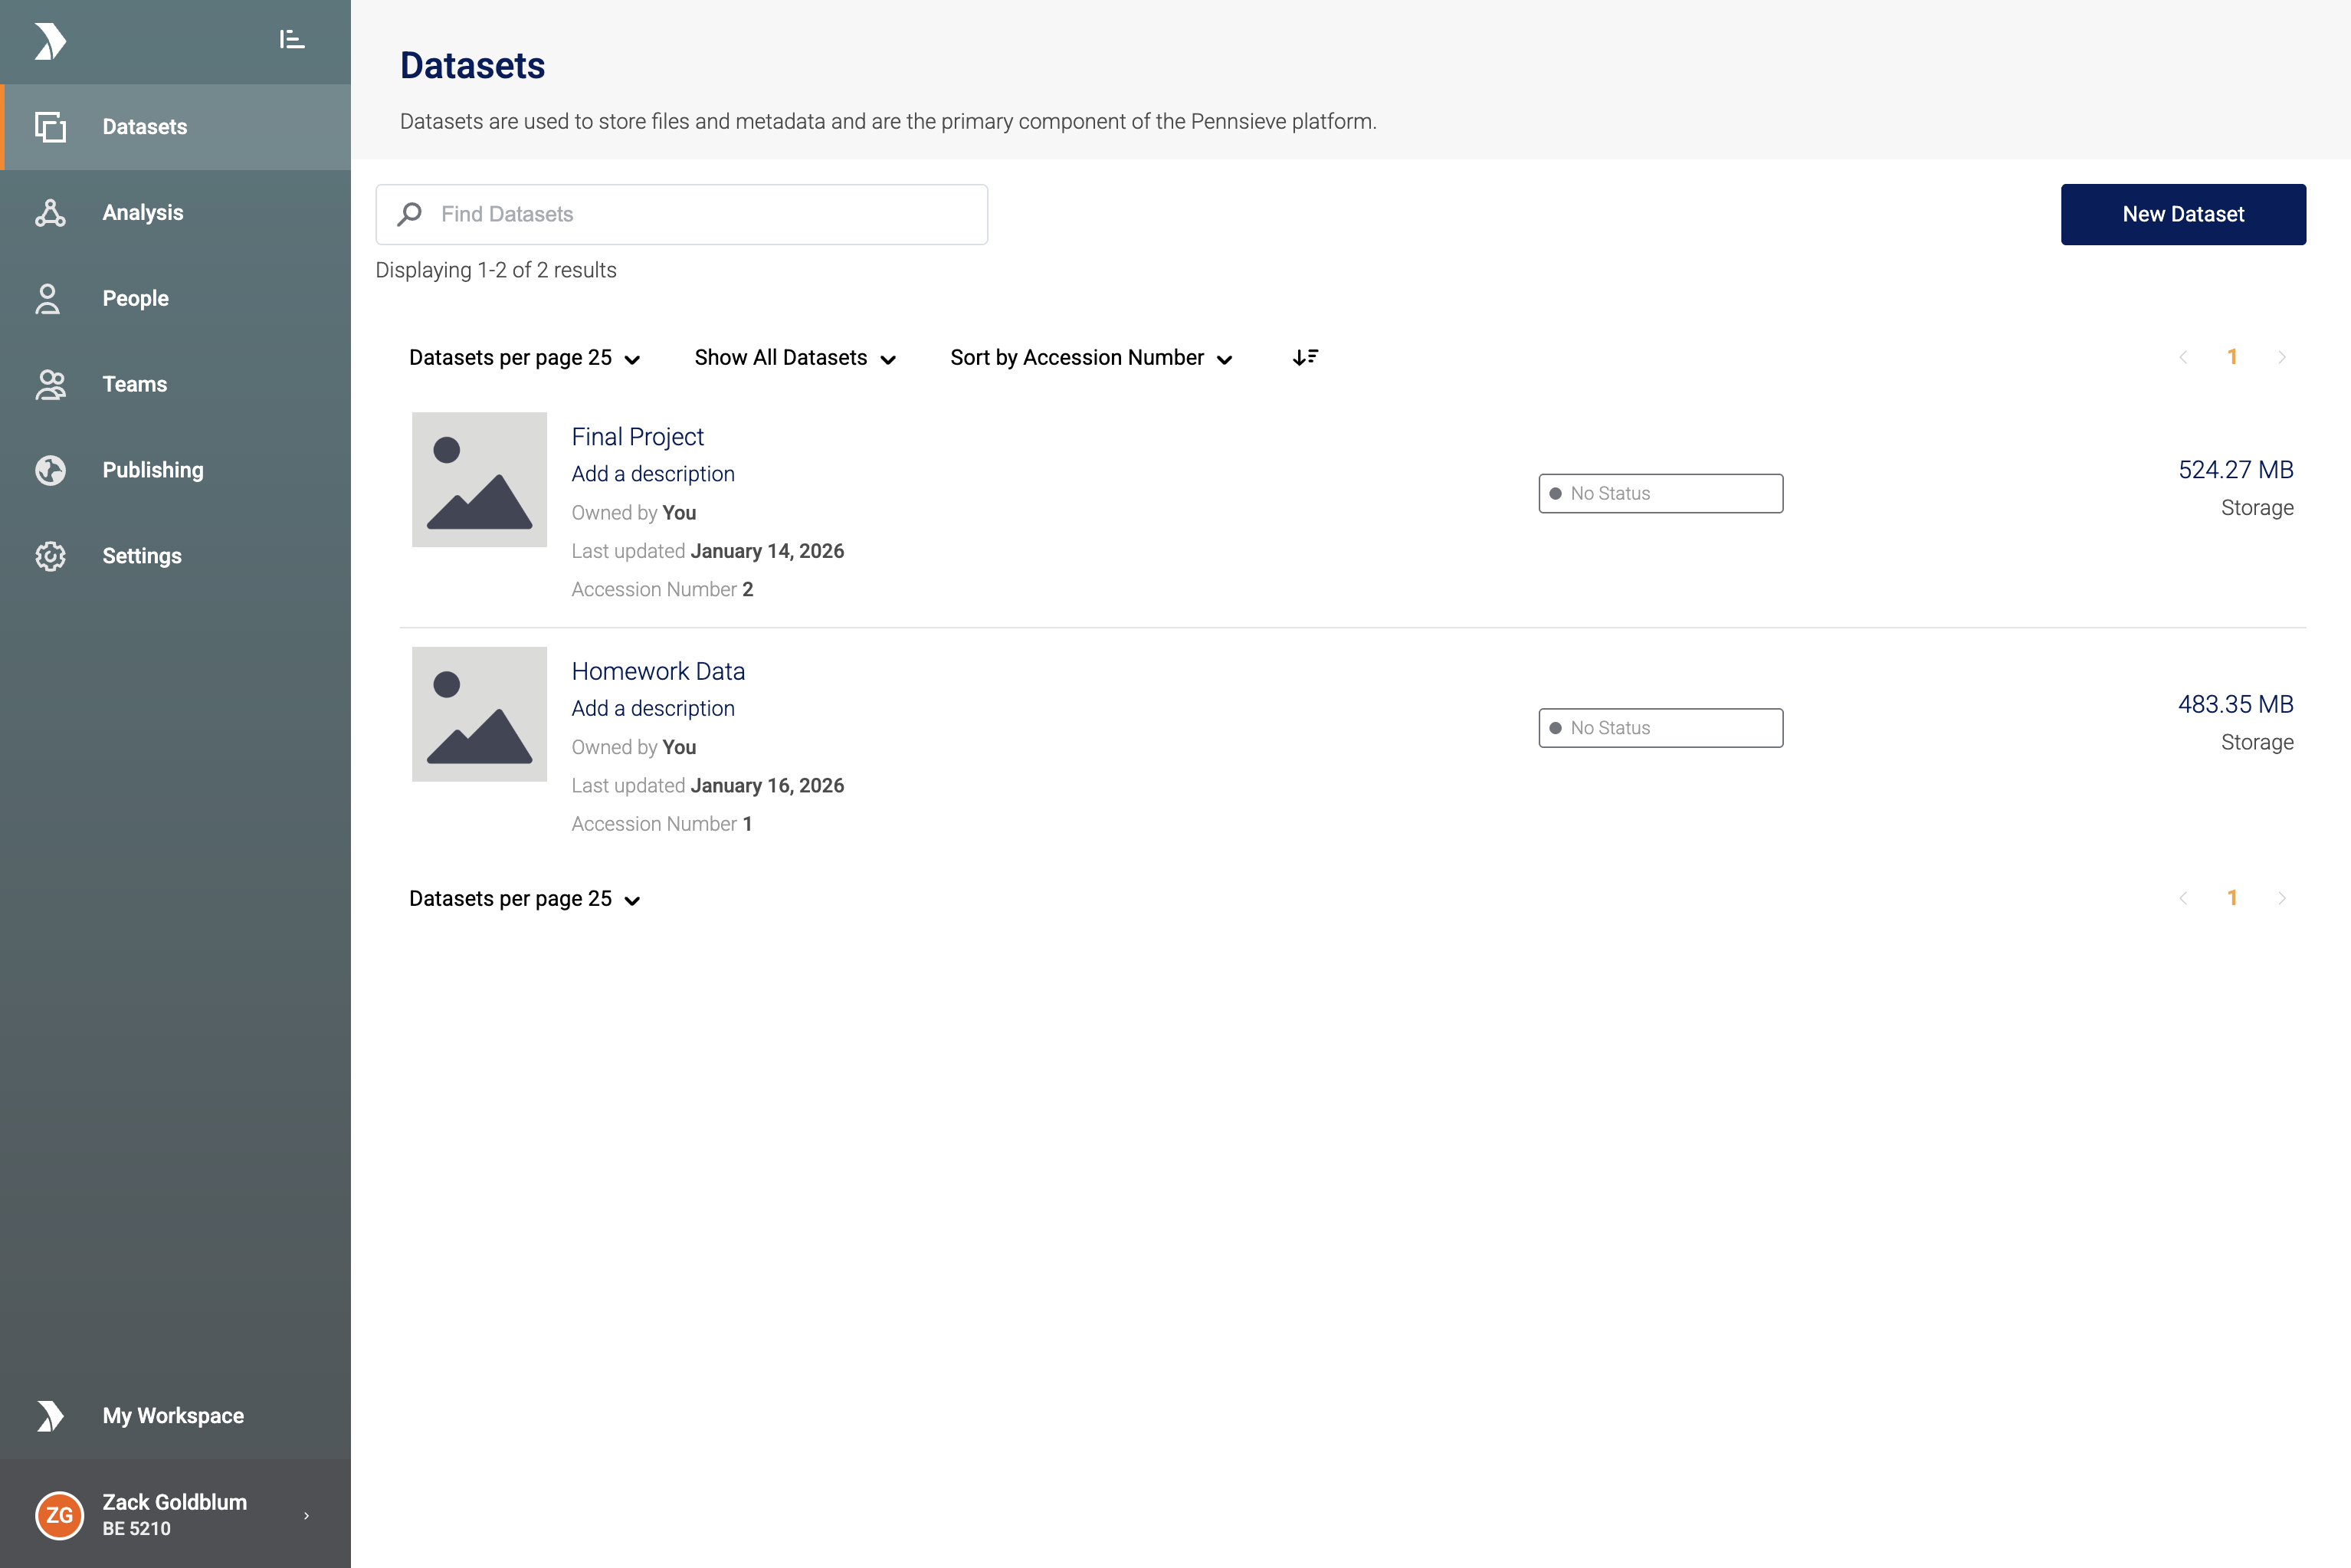

## Setup the Pennsieve API

In order to stream data from Pennsive cloud storage directly into your code, you will first need to create API credentials:

1. Switch your workspace to "My Workspace"
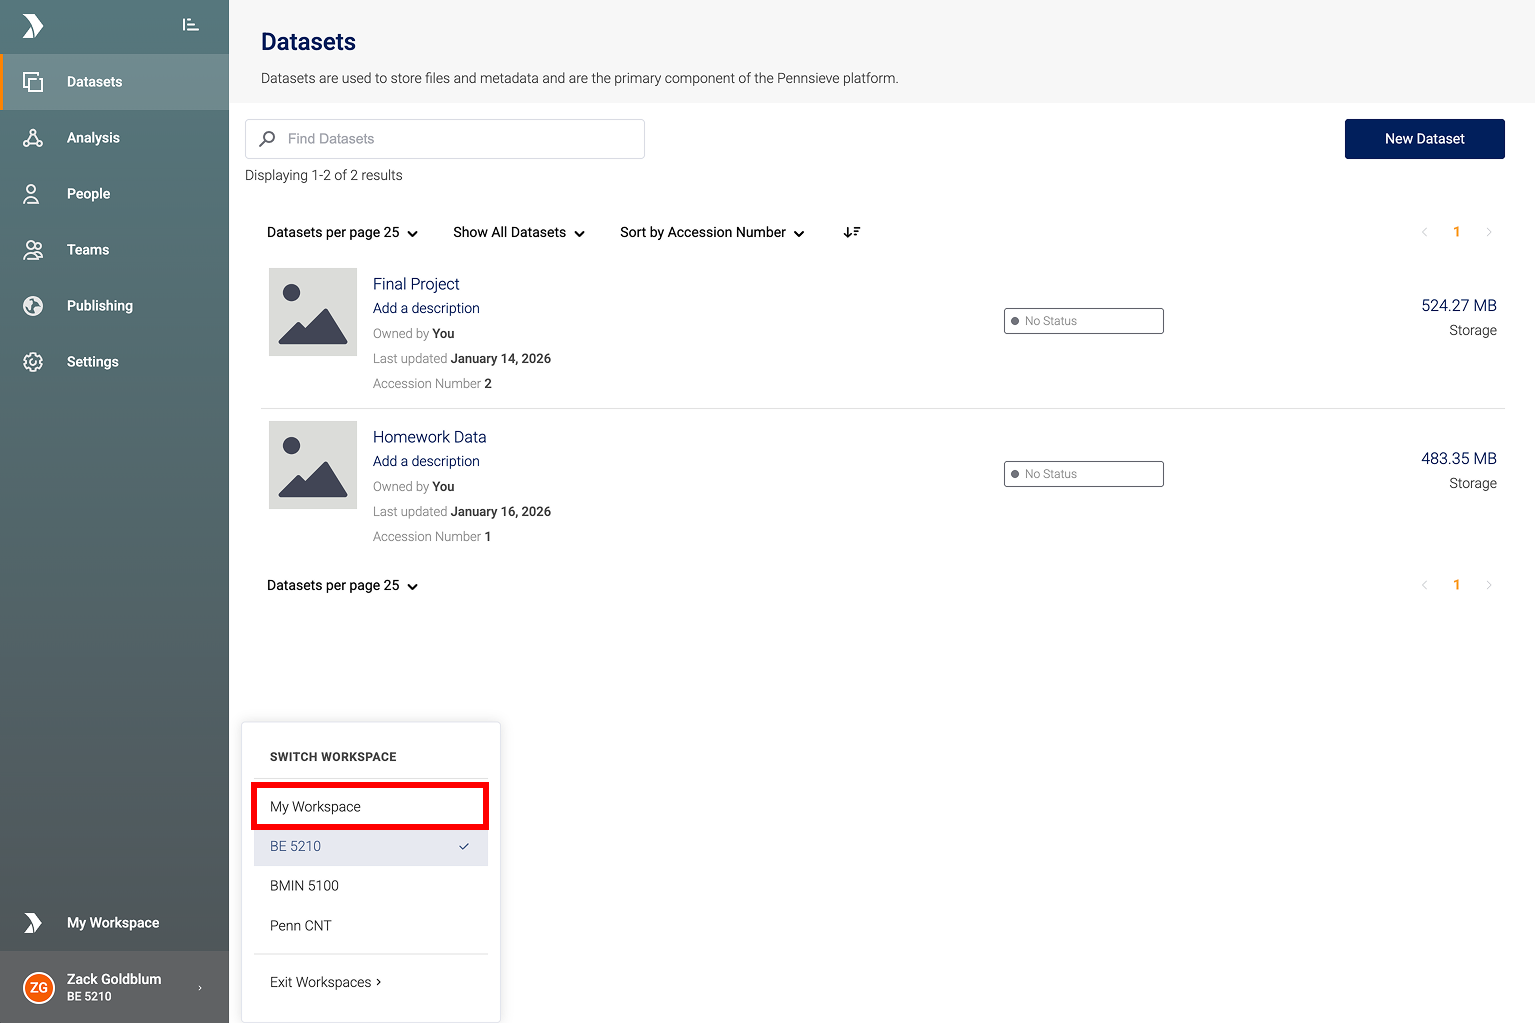

2. Click on "Account Settings"

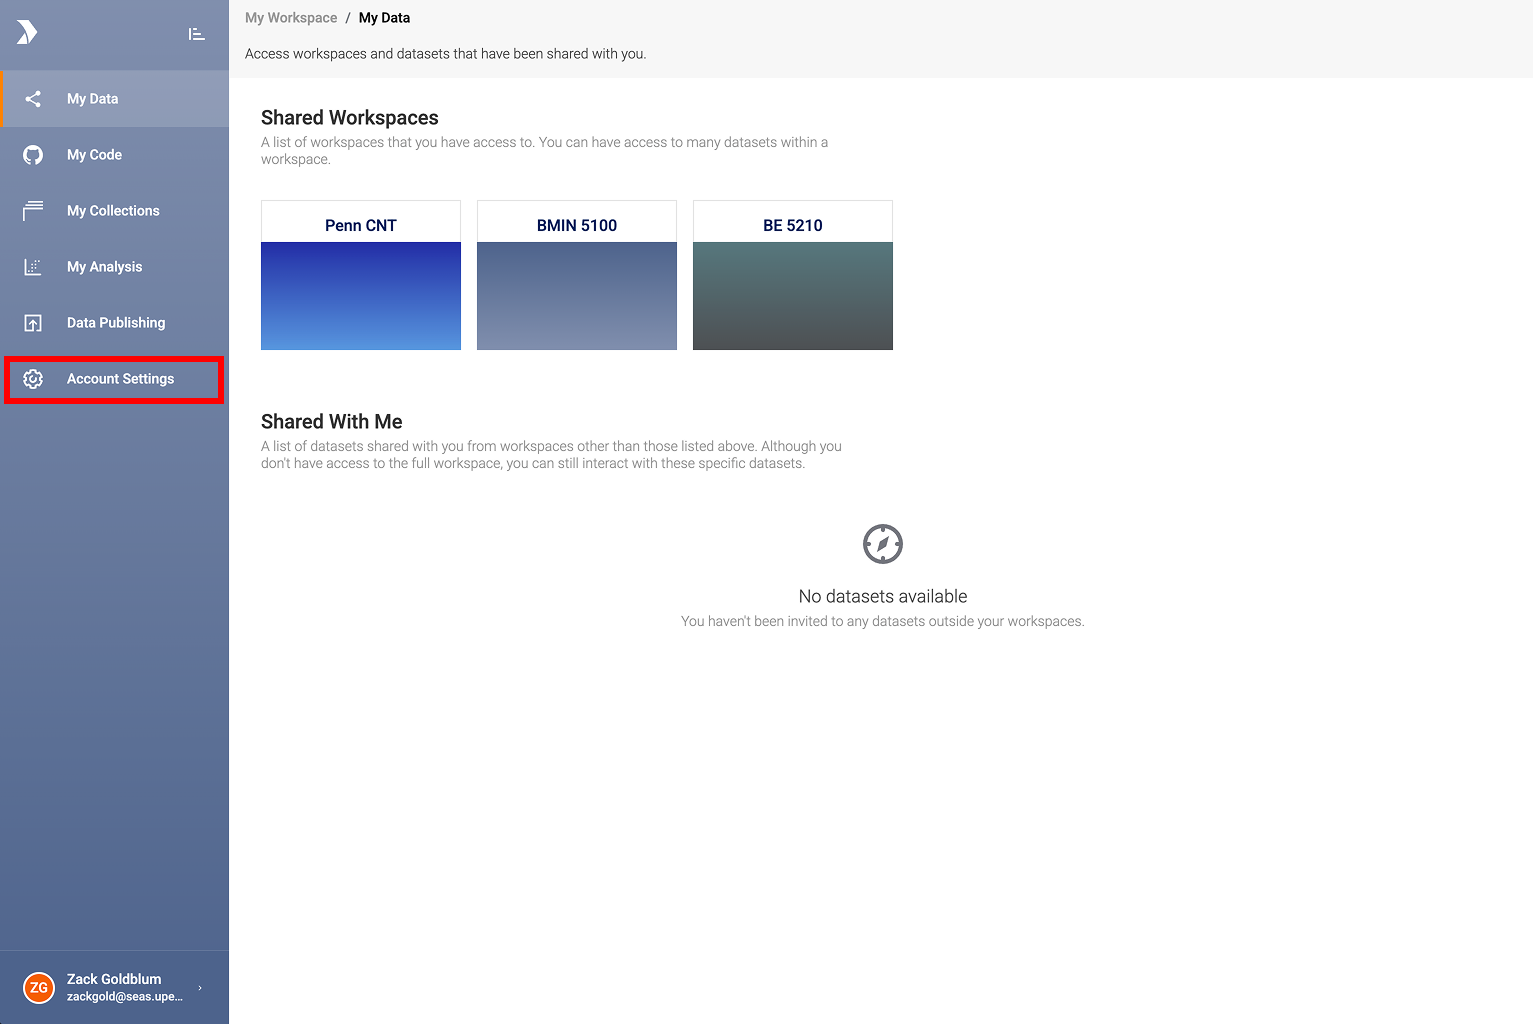

3. Then "Profile"

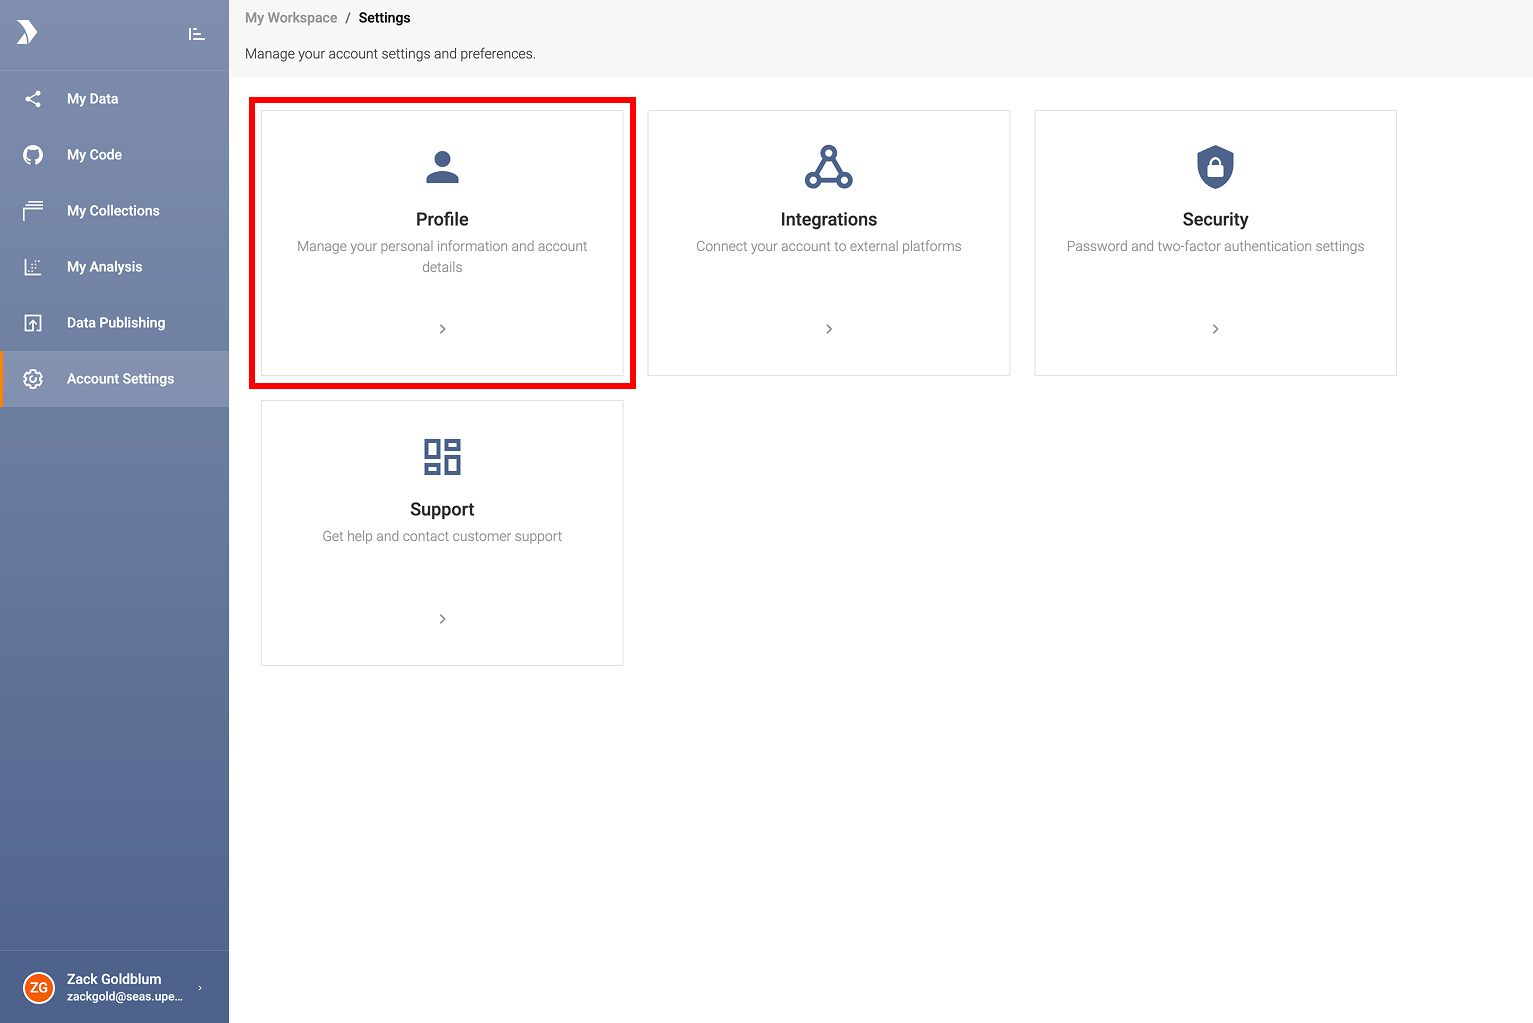

4. And under the "Integrations" tab, click "Manage API Keys"

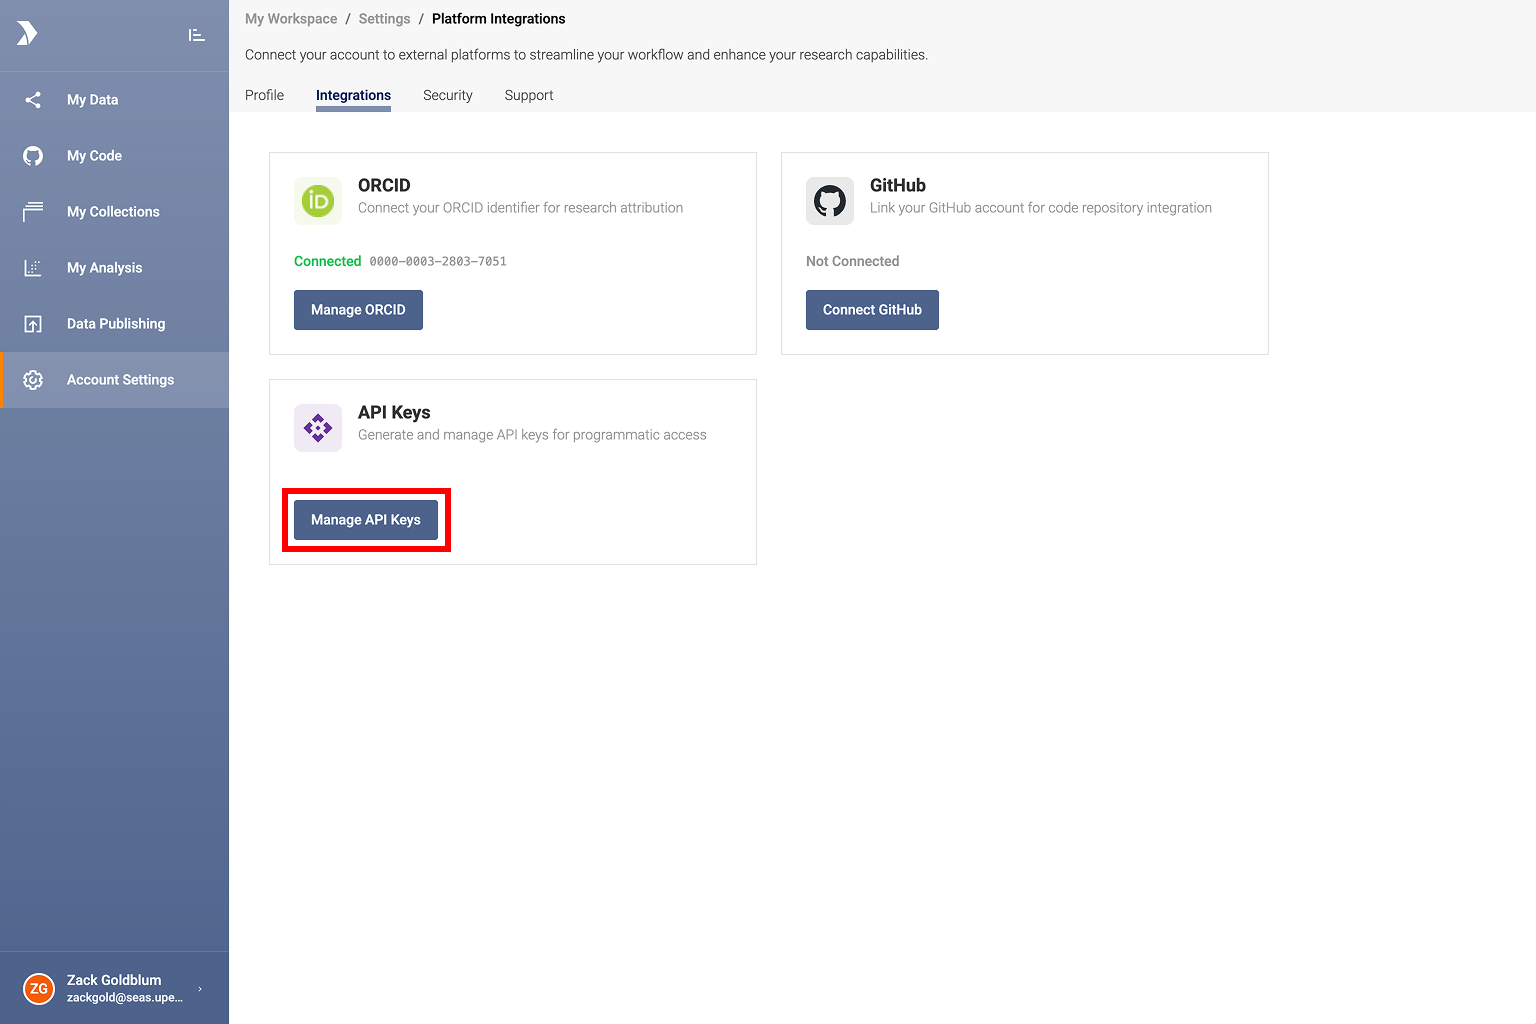

5. Select the BE 5210 workspace from the "Workspace" drop-down, then click "Create API Key"

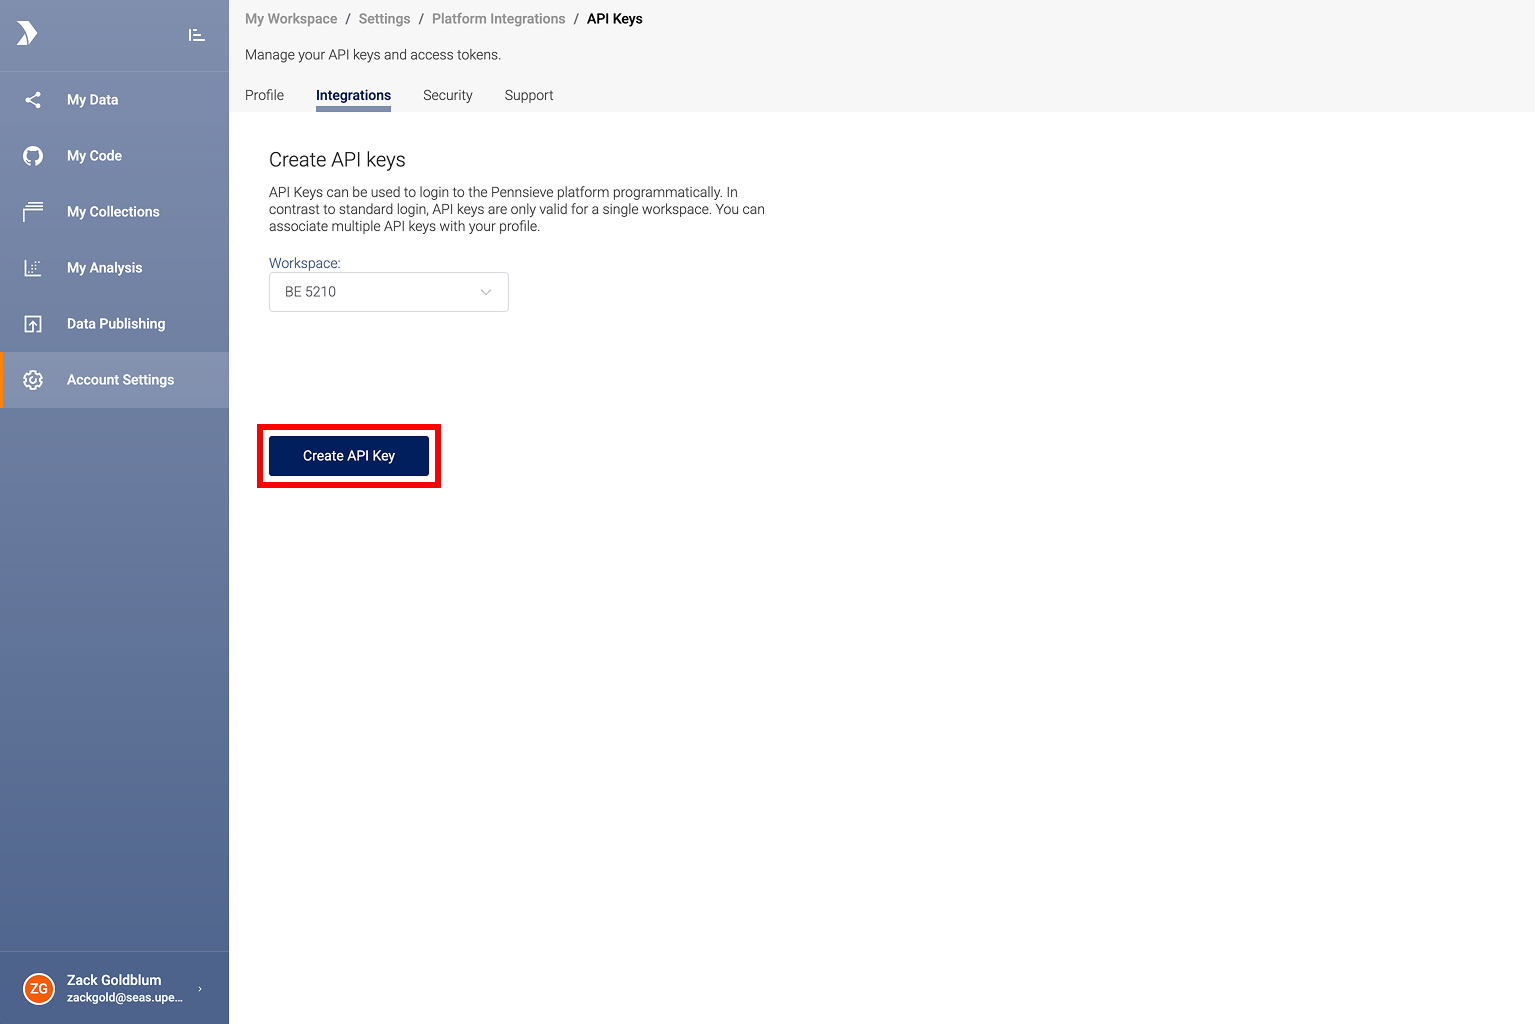

6. Label this "BE 5210" or something you'll easily remember, then click "Confirm"

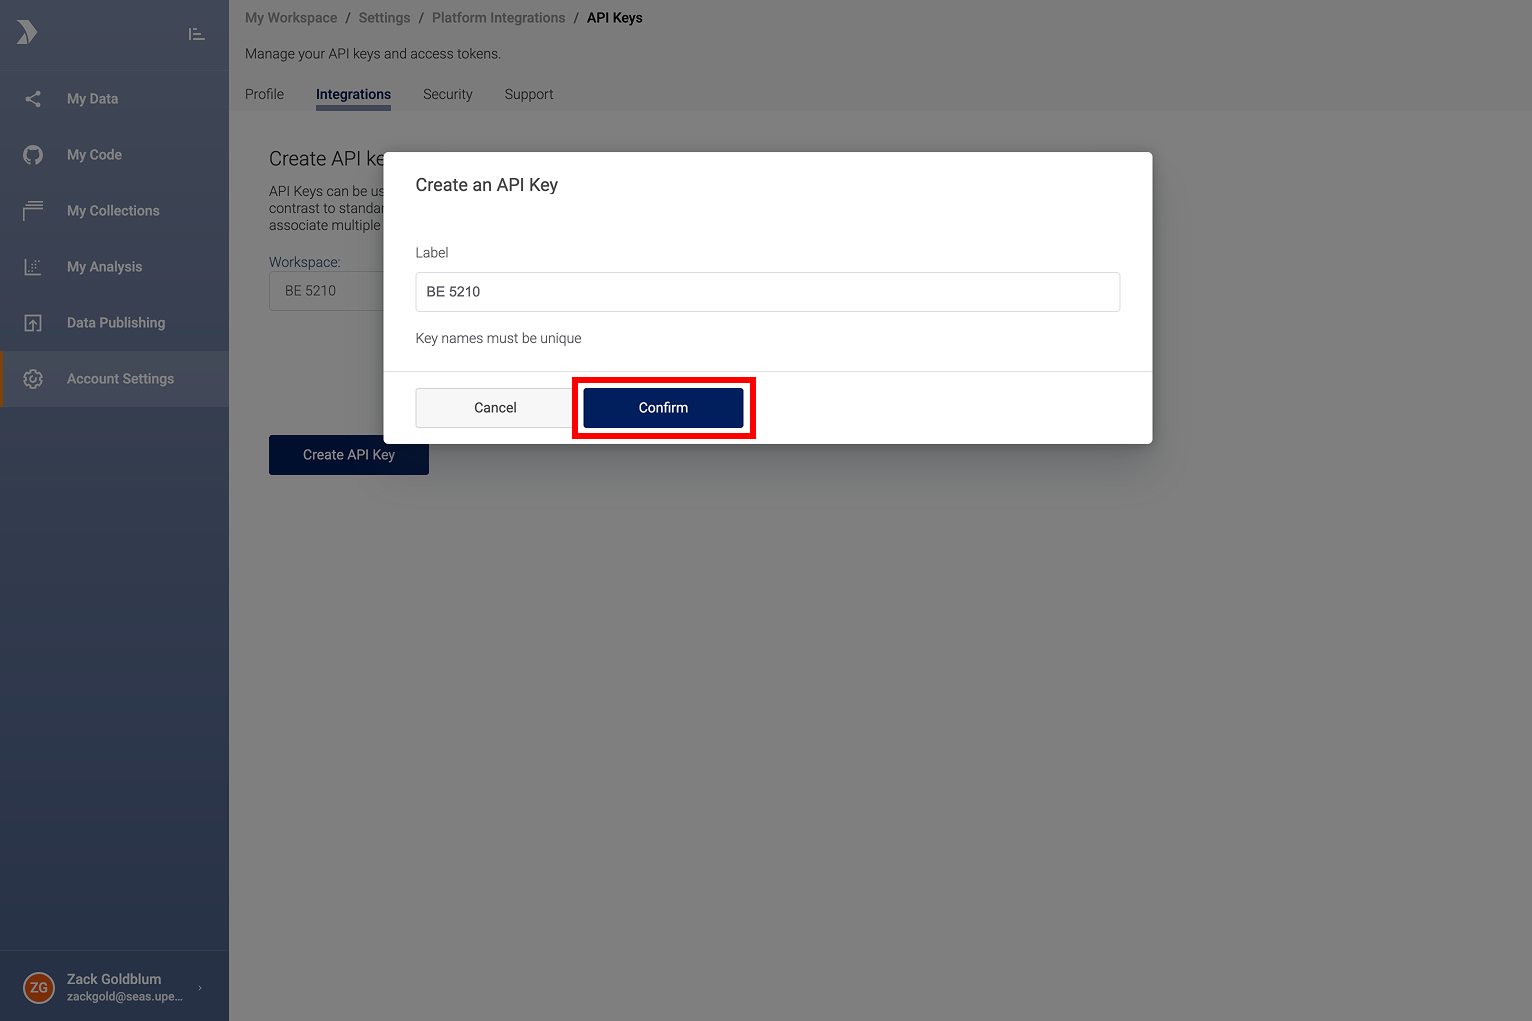

7. Finally, copy both the API key and API secret and save them somewhere you won't lose them. You **<u>cannot</u>** retrive the API secret again once you leave this page. If you do lose this information, you'll need to re-create a new API secret-key pair.

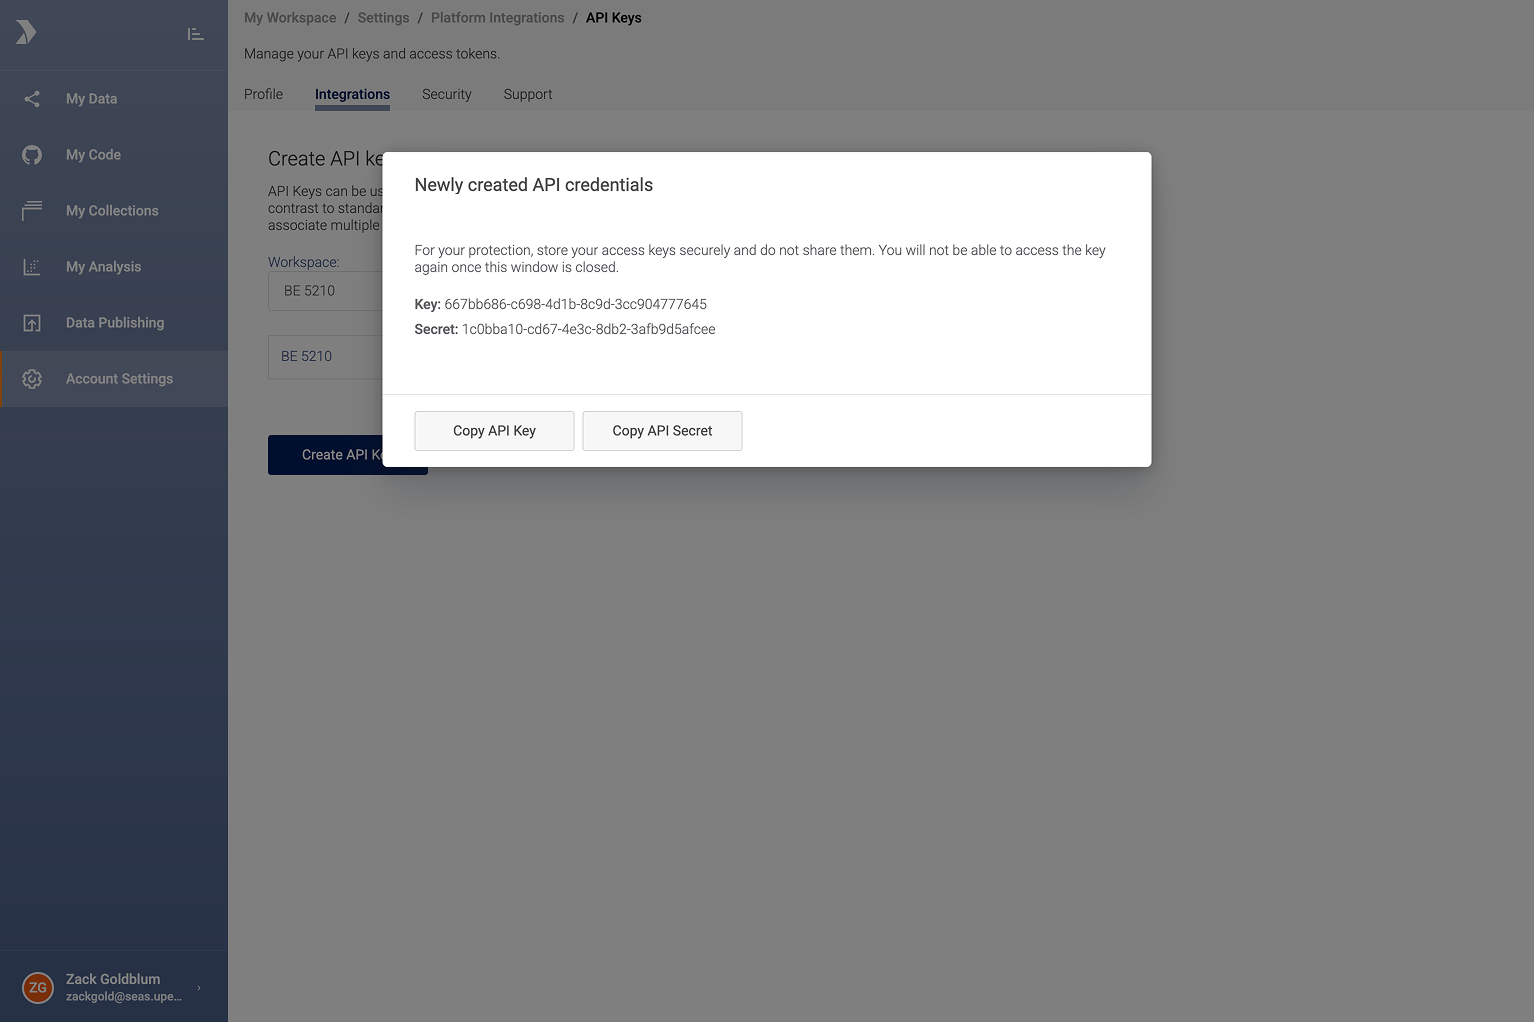

## Visualzing timeseries data on Pennsieve

1. In the BE 5210 workspace, open the "Homework Data" dataset

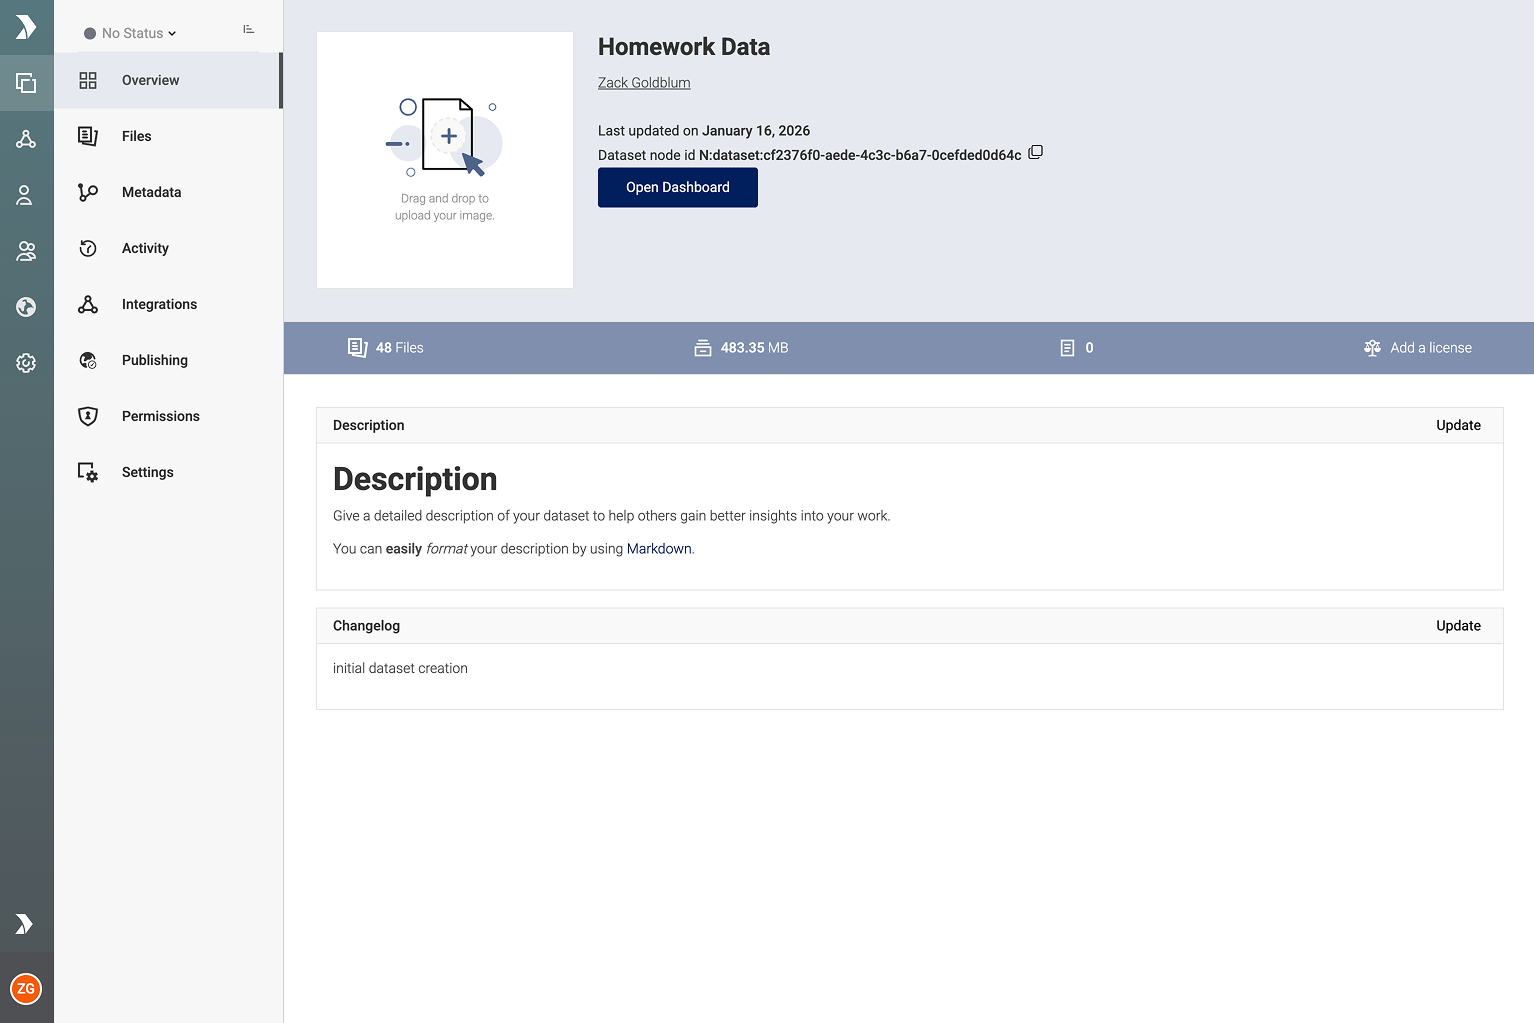

2. Click on the "Files" tab, then open I521_A0001_D001 (the dataset for this homework assignment)

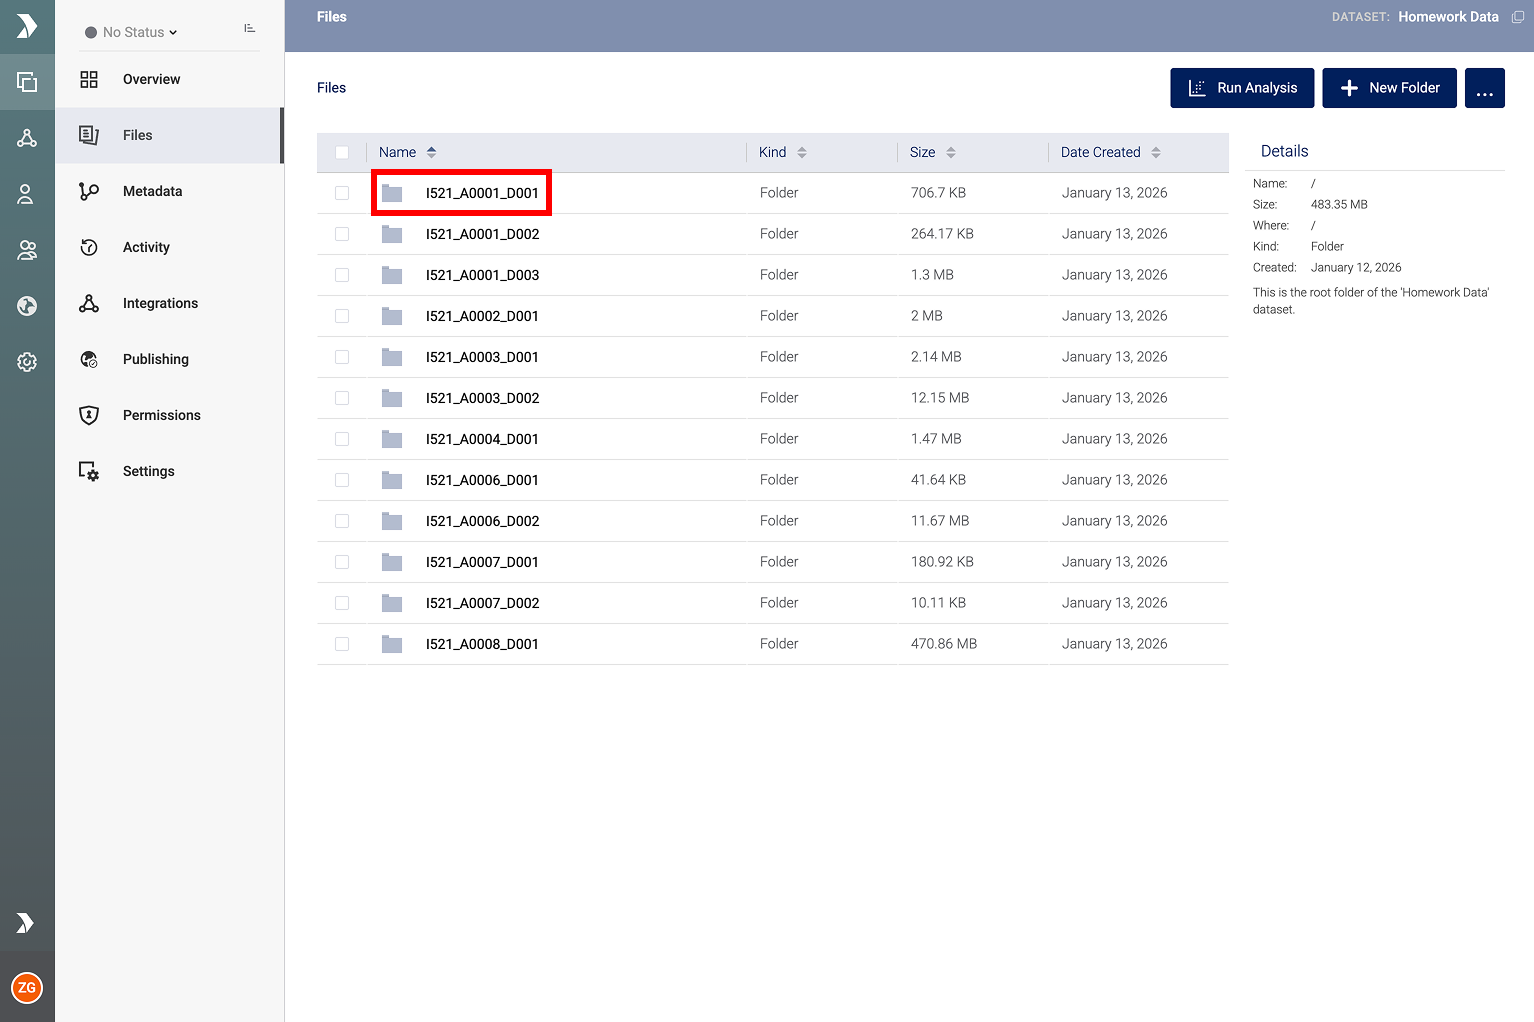

3. Then click on the .edf file and "Open Full Viewer"

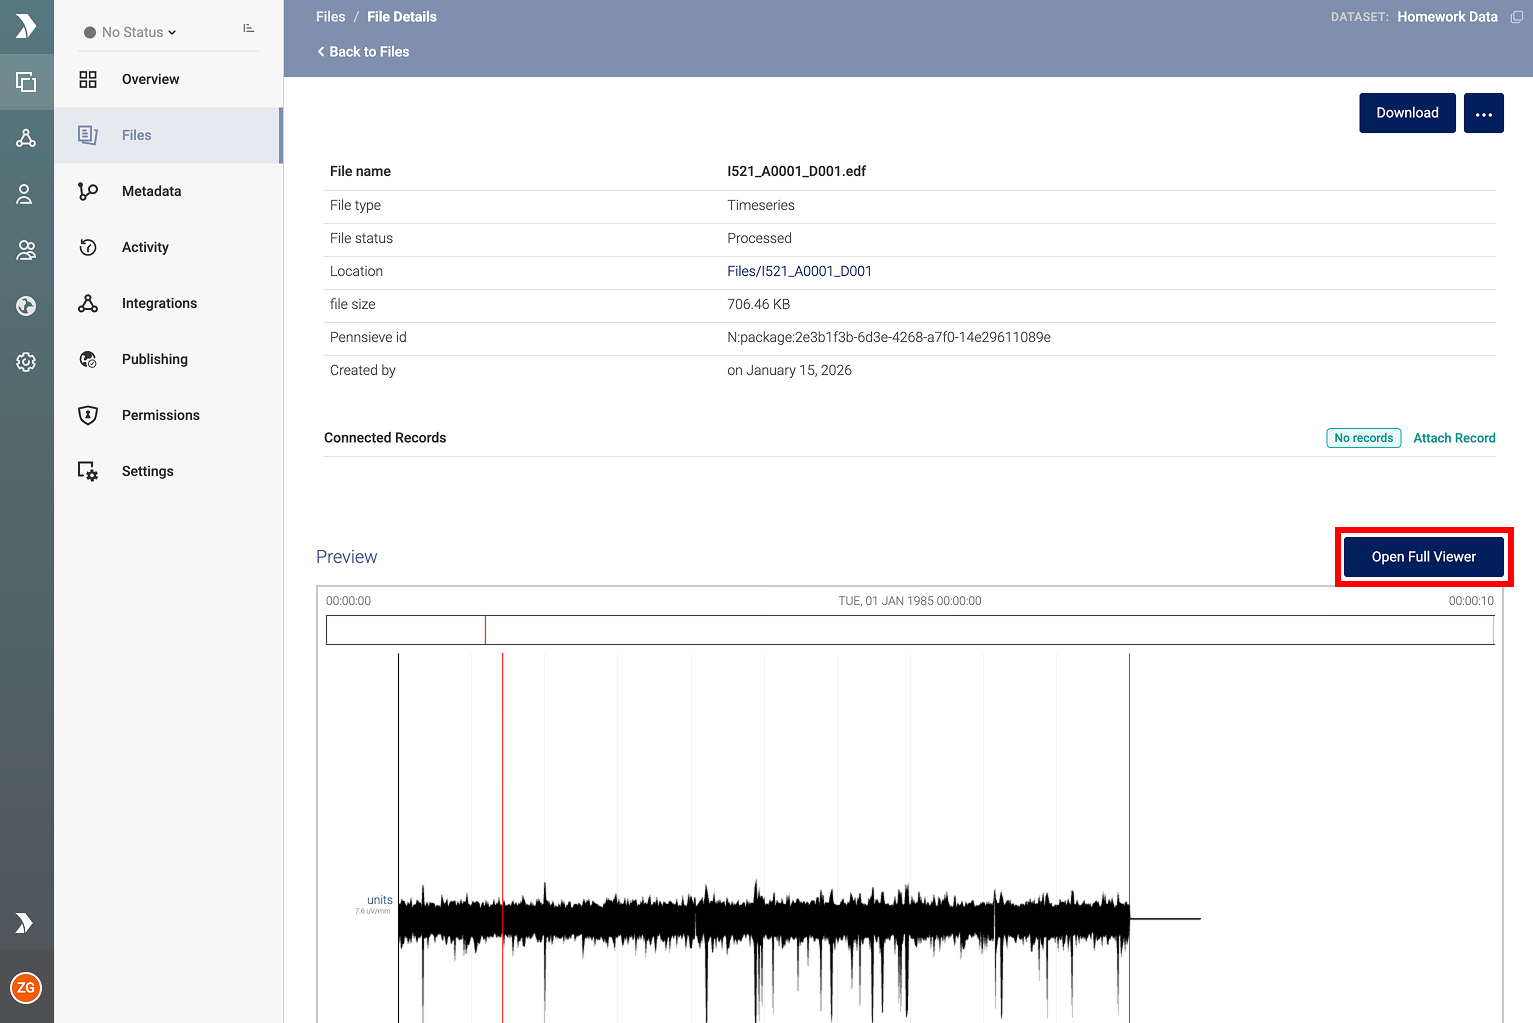

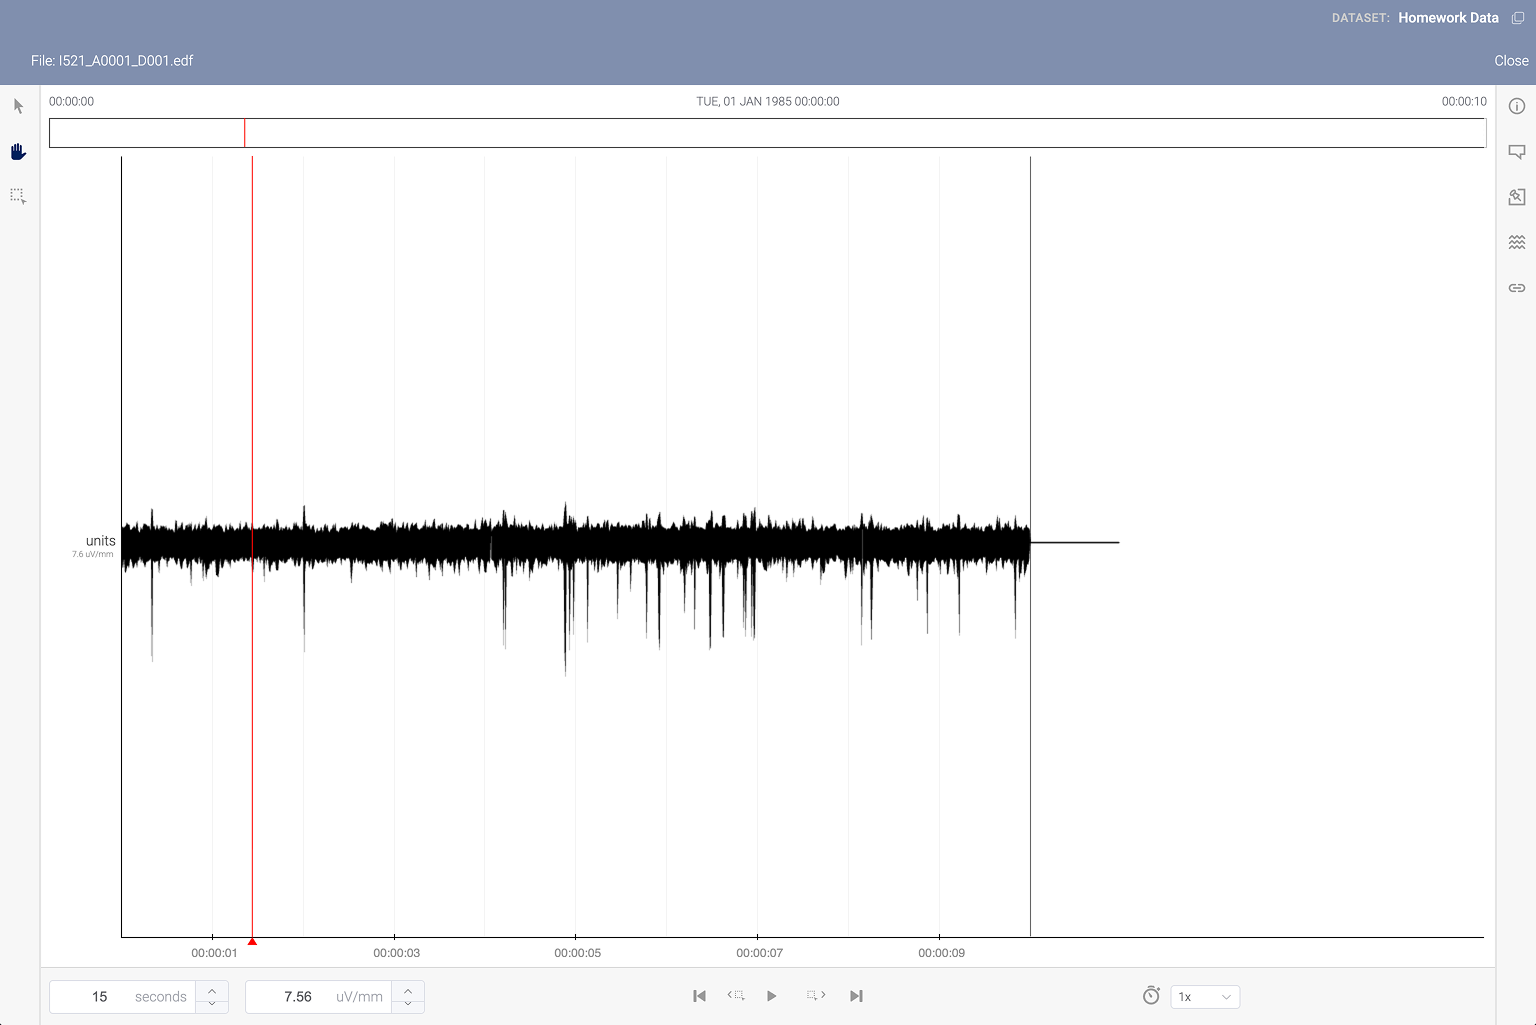

## Now, onto the actual homework!

### Install the Pennsieve Agent
See https://docs.pennsieve.io/docs/installing-the-pennsieve-agent for more details

<u>NOTE</u>: After you run the cell, you will encounter this warning:
```
Restart session
WARNING: The following packages were previously imported in this runtime:
  [google,numpy]
You must restart the runtime in order to use newly installed versions.

Restarting will lose all runtime state, including local variables.
```

Click "restart session" and then re-run the cell.

This is just a package dependency bug. We're aware of it and it will be fixed in future homeworks.

In [8]:
!wget https://github.com/Pennsieve/pennsieve-agent/releases/download/1.8.10/pennsieve_1.8.10_amd64.deb
!dpkg -i pennsieve_1.8.10_amd64.deb
!apt-get install -f
!rm pennsieve_1.8.10_amd64.deb
!pip install pennsieve

--2026-01-19 01:55:42--  https://github.com/Pennsieve/pennsieve-agent/releases/download/1.8.10/pennsieve_1.8.10_amd64.deb
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/471016268/ee2e6bbb-d461-49bd-95f6-48c60ce2f038?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-01-19T02%3A52%3A14Z&rscd=attachment%3B+filename%3Dpennsieve_1.8.10_amd64.deb&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-01-19T01%3A51%3A48Z&ske=2026-01-19T02%3A52%3A14Z&sks=b&skv=2018-11-09&sig=eXa9cTa35eTrUoyIQXv16jzB0Jv3VzeukWH904WgXKM%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2ODc4Nzk5NiwibmJmIjoxNzY4Nzg3Njk2LCJwYXRoIjoicmVsZW

### Provide your credentials to the Pennsieve Agent

Enter the following in the cell below when prompted:

Profile name [user] = FIRSTNAME LASTNAME

API token: YOUR API KEY

API secret: YOUR API SECRET

This will create a local config file (config.ini) in your notebook environment. This should keep you connected to the Pennsieve Agent even if the notebook runtime stops. We are working on a way for this to be a one-time setup, and will streamline this process in future homework assignments.

If you see this after restarting the runtime:
```
Existing configuration file found at: /root/.pennsieve/config.ini

Would you like to overwrite your existing configuration? (y/n):
```

Enter 'n', unless you have changed your credentials.

In [9]:
import os
import getpass

print("Enter API Token:")
api_token = getpass.getpass()

print("Enter API Secret:")
api_secret = getpass.getpass()

os.environ["PENNSIEVE_API_KEY"] = api_token
os.environ["PENNSIEVE_API_SECRET"] = api_secret

os.environ["PENNSIEVE_PROFILE"] = "Kevin Han"

print("Credentials set in environment variables.")

Enter API Token:
Enter API Secret:
Credentials set in environment variables.


### Run the Pennsieve Agent

In [10]:
%env PENNSIEVE_AGENT_PORT=9002
!pennsieve agent

env: PENNSIEVE_AGENT_PORT=9002
Pennsieve Agent started on port: 9002


### Install some packages

In [11]:
import os
import sys
import matplotlib
import pandas as pd
from contextlib import contextmanager

from pennsieve import Pennsieve

### Here we provide a class (PennsieveStreamer) to simplify the use of Pennsieve datasets for you

In [12]:
class PennsieveStreamer:
    """
    A simplified interface for streaming data from Pennsieve.
    """
    def __init__(self, target_port='localhost:9002'):
        """
        Initialize the connection to the Pennsieve Agent.

        Args:
            target_port (str): The address of the local Pennsieve Agent (default: localhost:9002).
        """
        self.ps = None
        self.dataset = None

        try:
            print(f"Connecting to Pennsieve Agent at {target_port}...")

            @contextmanager
            def suppress_stdout():
                with open(os.devnull, "w") as devnull:
                    old_stdout = sys.stdout
                    sys.stdout = devnull
                    try:
                        yield
                    finally:
                        sys.stdout = old_stdout

            with suppress_stdout():
                self.ps = Pennsieve(target=target_port)

            print("Successfully connected to Pennsieve Agent.")
        except Exception as e:
            print(f"Failed to connect to Pennsieve Agent: {e}")
            print("Ensure the Pennsieve Agent is running (run 'pennsieve agent' in terminal).")
            raise e

    def set_dataset(self, dataset_id: str):
        """
        Set the active dataset by ID. Resolves the ID to a name if necessary.

        Args:
            dataset_id (str): The Pennsieve Dataset ID (e.g., 'N:dataset:...').
        """
        print(f"Resolving dataset ID: {dataset_id}")
        datasets_dict = self.ps.get_datasets()

        found_name = None
        if isinstance(datasets_dict, dict):
            for name, id_val in datasets_dict.items():
                if id_val == dataset_id:
                    print(f"Found dataset: '{name}'")
                    found_name = name
                    break

        if not found_name:
             raise ValueError(f"Dataset with ID {dataset_id} not found in available datasets.")

        target = found_name

        try:
            self.ps.use_dataset(target)
            self.dataset = self.ps.dataset
            print(f"Active dataset set to: {target}")

        except Exception as e:
            print(f"Error setting dataset: {e}")
            raise e

    def get_clip(self, package_id: str, start_sec: float, end_sec: float) -> pd.DataFrame:
        """
        Stream a data clip for all channels in a package.

        Args:
            package_id (str): The ID of the TimeSeries package (file).
            start_sec (float): Start time in seconds relative to recording start.
            end_sec (float): End time in seconds relative to recording start.

        Returns:
            pd.DataFrame: A DataFrame containing the streamed data.
        """
        if not self.dataset:
            raise ValueError("Dataset not set. Call set_dataset() first.")

        # Get channels to get IDs
        channels = self.ps.timeseries.getChannels(self.dataset, package_id, True)

        if not channels:
            print("No channels found in this package.")
            return pd.DataFrame()

        channel_ids = [c.id for c in channels]

        data = self.ps.timeseries.getRangeForChannels(
            self.dataset,
            package_id,
            channel_ids,
            start_sec,
            end_sec,
            False, # force_refresh
            True   # is_relative_time
        )
        return data

    def get_metadata(self, package_id: str):
        """
        Retrieve metadata for the package (channels, rates, units).

        Args:
            package_id (str): The ID of the TimeSeries package.

        Returns:
            dict: Metadata including channel count and details (rate, unit, range).
        """
        if not self.dataset:
            raise ValueError("Dataset not set. Call set_dataset() first.")

        channels = self.ps.timeseries.getChannels(self.dataset, package_id, True) # include_data=True

        metadata = {
            "channel_count": len(channels),
            "channels": []
        }

        for c in channels:
            channel_info = {
                "name": getattr(c, 'name', 'Unknown'),
                "id": getattr(c, 'id', 'Unknown'),
                "rate_hz": getattr(c, 'rate', None),
                "unit": getattr(c, 'unit', None),
                "start_time": getattr(c, 'start_time', None),
                "end_time": getattr(c, 'end_time', None)
            }
            metadata["channels"].append(channel_info)

        return metadata

In [14]:
DATASET_ID = "N:dataset:cf2376f0-aede-4c3c-b6a7-0cefded0d64c"  # This is the "Homework Data" dataset id on Pennsieve
FILE_ID = "N:package:2e3b1f3b-6d3e-4268-a7f0-14e29611089e"  # This is the I521_A0001_D001.edf file id on Pennsieve

# 1. Initialize the class
streamer = PennsieveStreamer()

# 2. Set the dataset
streamer.set_dataset(DATASET_ID)

# 3 Get the file metadata
metadata = streamer.get_metadata(FILE_ID)

Connecting to Pennsieve Agent at localhost:9002...
Successfully connected to Pennsieve Agent.
Resolving dataset ID: N:dataset:cf2376f0-aede-4c3c-b6a7-0cefded0d64c
Found dataset: 'Homework Data'
Active dataset set to: Homework Data


## 1 Unit Activity (15 pts)

The dataset I521 A0001 D001 contains an example of multiunit human iEEG data recorded by Itzhak Fried and colleagues at UCLA using 40 micron platinum-iridium electrodes. Whenever you get new and potentially unfamiliar data, you should always play around with it: plot it, zoom in and out, look at the shape of individual items of interest (here, the spikes). The spikes here will be events appx. 5 ms in duration with amplitudes significantly greater than surrounding background signal.


### 1
Use the timeseries viewer functionality of Pennsieve to find a single time-window containing 3 spikes. The signal gain should be adjusted so that the spikes can be seen in entirety. Provide a screenshot of this with a 0.5 s window width (2 pts)

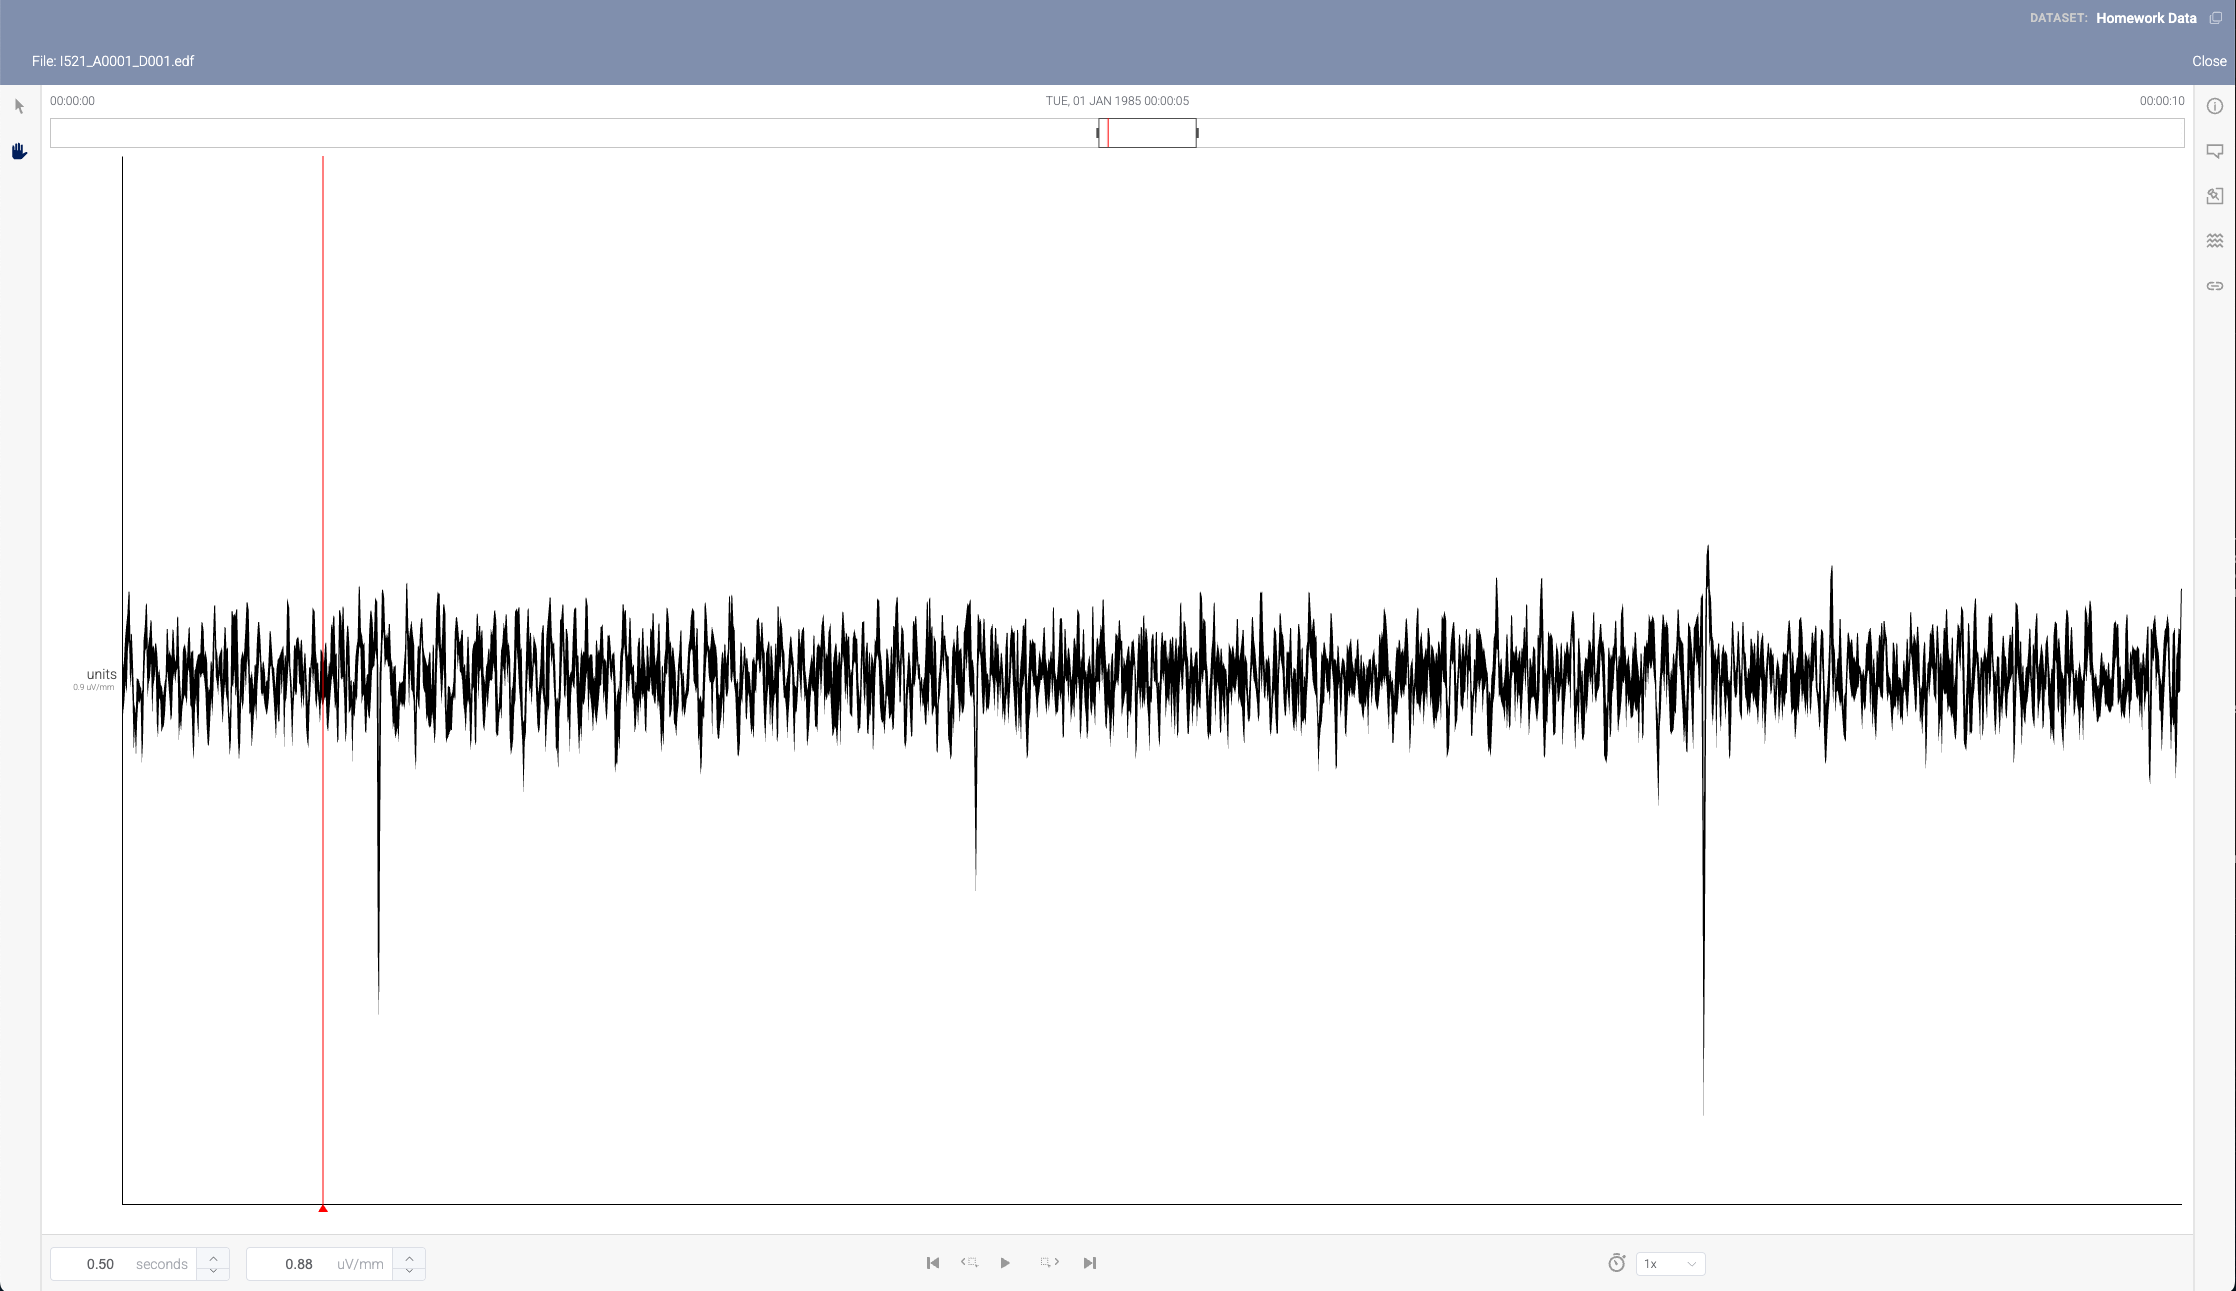

### 3
How long (in seconds) is this recording? Determine this from the file metadata. Timestamps are in microseconds (1 pt)

In [15]:
# Your code here
(metadata['channels'][0]['end_time'] - metadata['channels'][0]['start_time']) // 10 ** 6
# Ten seconds

10

```10 seconds```

### 4
What is the sampling rate of the recording? Give your answer in Hz. (2 pts)

In [16]:
# Your code here
metadata['channels'][0]['rate_hz']

32051.0

```32051 Hz```

### 5


#### 5a
Using the streamer.get_clip method (check the class definition above for documentation) retrieve the data from the time-window you plotted in Q1.1 and re-plot this data using matplotlib. Label your y-axis with the correct unit specified in the metadata. <u>NOTE</u>: Include the correct units and labels in plots for all homeworks. This is worth points. (3 pts)

320509


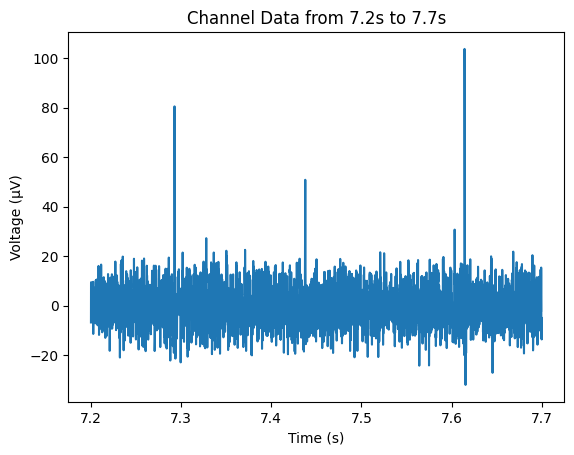

In [17]:
# Your code here
clip = streamer.get_clip(FILE_ID, 0, 10)

# Reindex the DataFrame
import numpy as np
print(len(clip))
clip.index = np.linspace(0, 10, len(clip))

# Take Subset
clip_subset = clip.loc[7.2:7.7].copy() # The timing indices don't seem to line up properly with the downloader
import matplotlib.pyplot as plt
plt.plot(clip_subset.index, clip_subset[clip_subset.columns[0]])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title('Channel Data from 7.2s to 7.7s')
plt.show()

#### 5b
Write a short bit of code to detect the timing of each spike peak (i.e., the time of the maximum spike amplitude) within your time-window. Plot an ```x``` above each spike peak that you detected, superimposed on the plot from Q1.5a. (Hint: find where the slope of the signal changes from positive to negative and the signal is also above threshold) (5 pts)

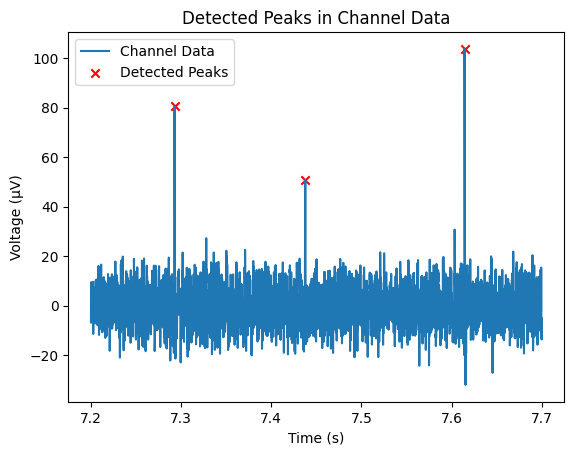

In [18]:
signal = clip_subset[clip_subset.columns[0]]
clip_subset['is_peak'] = (
    (signal > signal.shift(1)) & 
    (signal > signal.shift(-1)) & 
    (signal > 40)
)

# Plotting
plt.plot(clip_subset.index, clip_subset[clip_subset.columns[0]], label='Channel Data')
plt.scatter(clip_subset.index[clip_subset['is_peak']],
            clip_subset[clip_subset.columns[0]][clip_subset['is_peak']],
            color='red', label='Detected Peaks', marker='x')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title('Detected Peaks in Channel Data')
plt.legend()
plt.show()

####5c
How many spikes do you detect across the entire file? (1 pt)

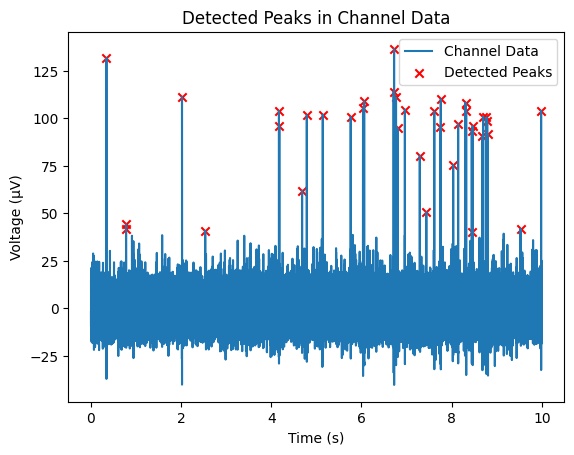

37 peaks detected


In [19]:
# Your code here
signal = clip[clip.columns[0]]
clip['is_peak'] = (
    (signal > signal.shift(1)) & 
    (signal > signal.shift(-1)) & 
    (signal > 40)
)

# Plotting
plt.plot(clip.index, clip[clip.columns[0]], label='Channel Data')
plt.scatter(clip.index[clip['is_peak']],
            clip[clip.columns[0]][clip['is_peak']],
            color='red', label='Detected Peaks', marker='x')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title('Detected Peaks in Channel Data')
plt.legend()
plt.show()

# Counting
num_peaks = clip['is_peak'].sum()
print(f"{num_peaks} peaks detected")

```37 peaks```